# 线性回归

## 一个特征的线性回归

数据来自于斯坦福Deep Learning课程的练习[Exercise: Linear Regression](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=DeepLearning&doc=exercises/ex2/ex2.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

### 读取数据

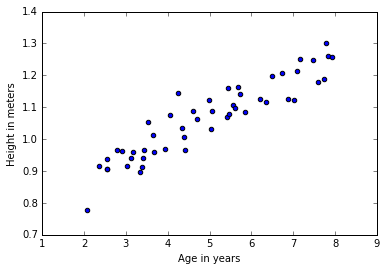

In [2]:
# 读取数据
x_arr = np.loadtxt('data/boys-height/x.dat')
x_arr.resize(len(x_arr), 1)
x_arr = np.append(np.ones((len(x_arr), 1)), x_arr, 1)
        
y_arr = np.loadtxt('data/boys-height/y.dat')
        
# 绘制数据
plt.scatter(x_arr[:, 1], y_arr)
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.show()

### 求解参数

通过normal equation求解得到的参数：theta_0=0.750162537001，theta_1=0.0638811658258
通过gradient descent迭代1800次后求解得到的参数：theta_0=0.750161166749，theta_1=0.0638814151262


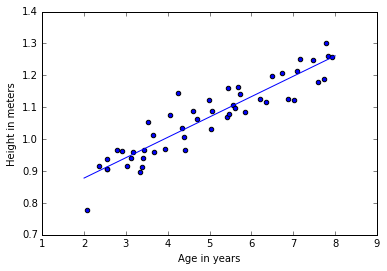

In [3]:
def gradient_descent(_x_arr, _y_arr, _theta_0, _theta_1, _alpha=0.07):
    """ 梯度下降函数
    
    :param _x_arr: 各个特征的值，包含了截距，所以在单特征时_x_arr的维度是 m×2
    :param _y_arr: 标签
    :param _theta_0: 
    :param _theta_1: 
    :param _alpha: 步长
    :return: 
    """
    _y_arr_predict = _x_arr[:,0] * _theta_0 + _x_arr[:,1] * _theta_1
    
    _theta_0 -= _alpha * np.mean(_y_arr_predict - _y_arr)
    _theta_1 -= _alpha * np.mean((_y_arr_predict - _y_arr) * _x_arr[:,1])
    
    return _theta_0, _theta_1

# 直接求解（normal equation）
x_mean = np.mean(x_arr[:,1])
theta_1 = np.sum(y_arr * (x_arr[:,1] - x_mean)) / (np.sum(x_arr[:, 1]**2) - np.sum(x_arr[:, 1])**2 / len(x_arr))
theta_0 = np.mean(y_arr - theta_1 * x_arr[:, 1])
print('通过normal equation求解得到的参数：theta_0=%s，theta_1=%s' % (theta_0, theta_1))

# 用梯度下降方法来求解
theta_0 = 0; theta_1 = 0  # 初始参数
theta_0_new = 0; theta_1_new = 0  # 迭代得到的参数
count = 1
while count < 2000:  # 迭代次数上限
    count += 1
    theta_0_new, theta_1_new = gradient_descent(x_arr, y_arr, theta_0, theta_1)
    # 如果迭代后 参数更新很小，就可以停止迭代了
    if abs(theta_0_new - theta_0) < 0.1e-7 and abs(theta_1_new - theta_1) < 0.1e-7:
        break
    theta_0 = theta_0_new
    theta_1 = theta_1_new
print('通过gradient descent迭代%s次后求解得到的参数：theta_0=%s，theta_1=%s' % (count, theta_0, theta_1))

# 绘制拟合直线
line_x = [2, 8]
line_y = [theta_0 + theta_1 * x for x in line_x]
plt.plot(line_x, line_y)
# 绘制样本
plt.scatter(x_arr[:, 1], y_arr)
plt.xlabel('Age in years'); plt.ylabel('Height in meters')

plt.show()

### 绘制损失函数等高线、损失函数与参数的关系

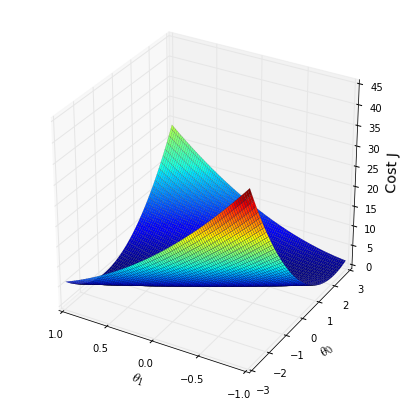

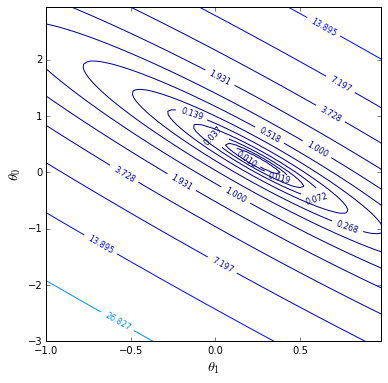

In [4]:
# 计算各个参数下的损失函数的值
theta_0_arr = np.arange(-3, 3, 0.06)
theta_1_arr = np.arange(-1, 1, 0.02)
z_vals = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        z_vals[i][j] = np.mean((theta_0_arr[j] + theta_1_arr[i] * x_arr[:, 1] - y_arr)**2) / 2

# 绘制损失函数与参数的关系
fig = plt.figure(1, figsize=(7, 7))
ax1 = fig.gca(projection='3d')
ax1.set_xlim([1, -1])
theta_1_arr, theta_0_arr = np.meshgrid(theta_1_arr, theta_0_arr)
ax1.plot_surface(theta_1_arr, theta_0_arr, z_vals,  rstride=2, cstride=1, cmap=cm.jet, linewidth=0.1, shade=True)
ax1.set_xlabel('$\\theta_1$', fontsize='x-large'); ax1.set_ylabel('$\\theta_0$', fontsize='x-large')
ax1.set_zlabel('Cost J', fontsize='x-large')

# 绘制损失函数的等高线
plt.figure(2, figsize=(6, 6))
CS = plt.contour(theta_1_arr, theta_0_arr,  z_vals, levels=np.logspace(-2, 2, 15))
plt.clabel(CS, inline=1, fontsize=8)
plt.xlabel('$\\theta_1$', fontsize='x-large'); plt.ylabel('$\\theta_0$', fontsize='x-large')

plt.show()

## 多个特征的线性回归

数据来自于斯坦福Deep Learning课程的练习[Exercise: Multivariance Linear Regression](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=DeepLearning&doc=exercises/ex3/ex3.html)

### 读取、处理数据

In [5]:
# 读取数据
x_arr = np.loadtxt('data/house-price/x.dat')
y_arr = np.loadtxt('data/house-price/y.dat')

# 处理数据
# 标准化处理
x_mean = np.mean(x_arr, 0)
x_std = np.std(x_arr, 0)
x_arr_scale = (x_arr - x_mean) / x_std
# 组装截距
x_arr_scale = np.append(np.ones((len(x_arr_scale), 1)), x_arr_scale, 1)
x_arr = np.append(np.ones((len(x_arr), 1)), x_arr, 1)
x_mat_scale = np.matrix(x_arr_scale)
x_mat = np.matrix(x_arr)
# 将标签表示成 m×1 的矩阵
y_mat = np.matrix(y_arr)
y_mat.resize((len(x_mat), 1))

### 寻找合适的学习率（alpha）

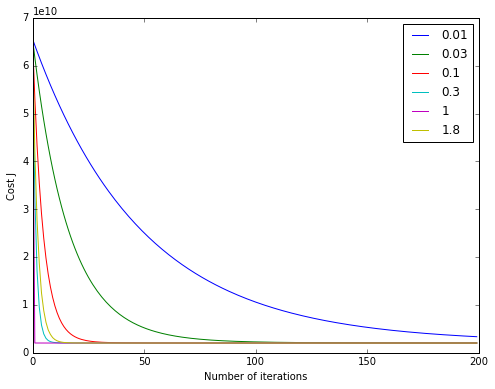

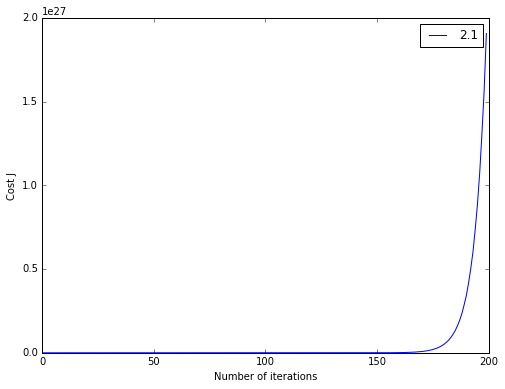

In [6]:
def mse(_x_mat, _y_mat, _thetas_mat):
    """ 求均方误差
    
    :param _x_mat: 各样本的特征值。m×(n+1) 的矩阵，这里例子是47×3
    :param _y_mat: 各样本的标签。m×1 的矩阵
    :param _thetas_mat: 模型参数。(n+1)×1 的矩阵。这里是3×1
    :return: 
    """
    _err = _x_mat * _thetas_mat - _y_mat
    rs = _err.T * _err / 2 / _y_mat.shape[0]
    
    return rs.flat[0]
    
def gradient_descent(_x_arr, _y_arr, _thetas, _alpha=2):
    """ 梯度下降函数
    
    :param _x_arr: 各样本的特征值。ndarray类型 
    :param _y_arr: 各样本的标签。ndarray类型 
    :param _thetas: 模型参数。ndarray类型 
    :param _alpha: 学习率
    :return: 更新后的模型参数
    """
    for j in range(_x_arr.shape[1]):
        err_list = [0.0] * _x_arr.shape[0]
        
        for i in range(_x_arr.shape[0]):
            err_list[i] = (np.sum(_x_arr[i, :] * _thetas) - _y_arr[i]) * _x_arr[i, j]

        _thetas[j] = _thetas[j] - _alpha * np.mean(err_list, 0)
    return _thetas

# 寻找学习率alpha
alphas = [0.01, 0.03, 0.1, 0.3, 1, 1.8]
plt.figure(1, figsize=(8, 6))
for alpha in alphas:
    count = 0
    mse_list = [0.0] * 200
    thetas = np.array([0.0, 0.0, 0.0])
    
    while count < 200:
        mse_list[count] = mse(x_mat_scale, y_mat, np.matrix(thetas).T)
        count += 1
        thetas = gradient_descent(x_arr_scale, y_arr, thetas.copy(), alpha)
    plt.plot(range(200), mse_list, label=alpha)
plt.legend()
plt.xlabel('Number of iterations', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')

# 学习率过大会发散
plt.figure(2, figsize=(8, 6))
count = 0
mse_list = [0.0] * 200
thetas = np.array([0.0, 0.0, 0.0])

while count < 200:
    mse_list[count] = mse(np.matrix(x_arr_scale), y_mat, np.matrix(thetas).T)
    count += 1
    thetas = gradient_descent(x_arr_scale, y_arr, thetas.copy(), 2.1)
plt.plot(range(200), mse_list, label=2.1)
plt.legend()
plt.xlabel('Number of iterations', fontsize='medium'); plt.ylabel('Cost J', fontsize='medium')
plt.show()

In [7]:
# 选择学习步长 alpha=1，迭代 50 次
count = 0
thetas = np.array([0.0, 0.0, 0.0])
while count < 50:
    count += 1
    thetas = gradient_descent(x_arr_scale, y_arr, thetas.copy(), 1)
print('通过gradient descent得到的参数为：%s' % thetas, end='')

# 预测数据
x_predict = np.array([1650, 3])
x_predict_scale = (x_predict - x_mean) / x_std
x_predict_scale = np.append(np.ones(1), x_predict_scale, 0)
x_predict = np.append(np.ones(1), x_predict, 0)

# 
print('。预测值为：%s' % np.sum(thetas * x_predict_scale))

# 通过求导得到闭式解（normal equation）
thetas2 = np.array((x_mat.T*x_mat).I * x_mat.T * y_mat).ravel()
print('通过normal equation得到的参数为：%s' % thetas2, end='')
print('。预测值为：%s' % np.sum(thetas2 * x_predict))

通过gradient descent得到的参数为：[ 340412.65957447  109447.79646964   -6578.35485416]。预测值为：293081.464335
通过normal equation得到的参数为：[ 89597.9095428     139.21067402  -8738.01911233]。预测值为：293081.464335
